# 加载自定义模块

In [2]:
import mxjqsakit

# 读取数据

In [3]:
import pandas as pd
# gbsg = pd.read_csv("GBSG.csv")
# gbsg.head()
Train = pd.read_csv("Pre_combined_train_cox.csv")
Internal = pd.read_csv("Pre_combined_val_cox.csv")
Train.head()
#Internal.head()

,ID,2.5DL_8,2.5DL_3,2.5DL_4,intra-peri_exponential_gldm_DependenceNonUniformityNormalized,2.5DL_6,intra-peri_log_sigma_1_0_mm_3D_glszm_ZoneVariance,2.5DL_11,intra-peri_wavelet_LLL_glcm_ClusterShade,intra-peri_log_sigma_3_0_mm_3D_firstorder_Maximum,...,2DL_58,2DL_119,2DL_5,intra-peri_exponential_glrlm_ShortRunEmphasis,2DL_9,2.5DL_18,intra-peri_exponential_ngtdm_Busyness,intra-peri_log_sigma_1_0_mm_3D_glszm_LargeAreaHighGrayLevelEmphasis,event,duration
0,bianjiePVP.nii.gz,0.081662,-0.654635,-0.396091,-0.273707,0.367815,-0.285285,1.148658,1.170365,0.749813,...,0.631098,-1.330338,0.255232,0.651421,-0.431598,0.067341,0.157524,-0.175193,1,44.33
1,caibinPVP.nii.gz,0.942460,-1.061639,0.396285,3.961650,0.133446,-0.328408,-1.882962,0.748434,-2.691205,...,-1.978190,-0.066791,0.462323,1.967422,-2.309945,0.675423,-0.519850,-0.277194,0,17.63
2,caiqingxiangPVP.nii.gz,-0.255836,0.928865,0.974463,-0.585785,-1.250419,-0.186995,0.577926,0.264384,1.991382,...,-1.377698,-0.902314,0.895413,0.095392,0.424496,-0.051880,0.044413,-0.127864,1,7.43
3,caiyunboPVP.nii.gz,-1.149721,-0.952892,0.852998,-0.497870,0.038468,-0.273516,-0.116221,0.629104,-0.315793,...,-1.028278,-1.597590,0.274432,-1.297464,1.346493,0.117881,-0.013698,-0.232942,1,29.10
4,caoguofangPVP.nii.gz,-0.127231,-0.485288,1.083136,-0.288143,1.671187,0.230298,0.332625,0.159520,0.588792,...,-0.235811,-0.806661,-1.197611,0.318898,0.344274,-0.224431,-0.262455,-0.009976,0,21.33


In [4]:
# 剔除无关变量
# gbsg.drop("pid", axis=1, inplace=True)
# gbsg.head()
Train.drop("ID", axis = 1, inplace=True)
Internal.drop("ID", axis = 1, inplace=True)
Train.shape
Train.head()
# Internal.shape

,2.5DL_8,2.5DL_3,2.5DL_4,intra-peri_exponential_gldm_DependenceNonUniformityNormalized,2.5DL_6,intra-peri_log_sigma_1_0_mm_3D_glszm_ZoneVariance,2.5DL_11,intra-peri_wavelet_LLL_glcm_ClusterShade,intra-peri_log_sigma_3_0_mm_3D_firstorder_Maximum,2.5DL_219,...,2DL_58,2DL_119,2DL_5,intra-peri_exponential_glrlm_ShortRunEmphasis,2DL_9,2.5DL_18,intra-peri_exponential_ngtdm_Busyness,intra-peri_log_sigma_1_0_mm_3D_glszm_LargeAreaHighGrayLevelEmphasis,event,duration
0,0.081662,-0.654635,-0.396091,-0.273707,0.367815,-0.285285,1.148658,1.170365,0.749813,-0.762009,...,0.631098,-1.330338,0.255232,0.651421,-0.431598,0.067341,0.157524,-0.175193,1,44.33
1,0.942460,-1.061639,0.396285,3.961650,0.133446,-0.328408,-1.882962,0.748434,-2.691205,-0.414065,...,-1.978190,-0.066791,0.462323,1.967422,-2.309945,0.675423,-0.519850,-0.277194,0,17.63
2,-0.255836,0.928865,0.974463,-0.585785,-1.250419,-0.186995,0.577926,0.264384,1.991382,0.543395,...,-1.377698,-0.902314,0.895413,0.095392,0.424496,-0.051880,0.044413,-0.127864,1,7.43
3,-1.149721,-0.952892,0.852998,-0.497870,0.038468,-0.273516,-0.116221,0.629104,-0.315793,0.506151,...,-1.028278,-1.597590,0.274432,-1.297464,1.346493,0.117881,-0.013698,-0.232942,1,29.10
4,-0.127231,-0.485288,1.083136,-0.288143,1.671187,0.230298,0.332625,0.159520,0.588792,-0.417263,...,-0.235811,-0.806661,-1.197611,0.318898,0.344274,-0.224431,-0.262455,-0.009976,0,21.33


In [5]:
# 数据列类型
Train.dtypes
Internal.dtypes

2.5DL_8                                                                float64
2.5DL_3                                                                float64
2.5DL_4                                                                float64
intra-peri_exponential_gldm_DependenceNonUniformityNormalized          float64
2.5DL_6                                                                float64
intra-peri_log_sigma_1_0_mm_3D_glszm_ZoneVariance                      float64
2.5DL_11                                                               float64
intra-peri_wavelet_LLL_glcm_ClusterShade                               float64
intra-peri_log_sigma_3_0_mm_3D_firstorder_Maximum                      float64
2.5DL_219                                                              float64
intra-peri_wavelet_LLL_ngtdm_Busyness                                  float64
intra-peri_squareroot_glszm_LowGrayLevelZoneEmphasis                   float64
intra-peri_exponential_gldm_DependenceVariance      

In [6]:
# 分类型自变量训练集
# catnames = [Train.columns.to_list()[i] for i in [0, 1, 2, 3]]
# catnames_train = Train.columns.to_list()[0:3]
catnames_train = []
print(catnames_train)
# 分类型自变量内部验证集
# catnames = [Train.columns.to_list()[i] for i in [0, 1, 2, 3]]
# catnames_internal = Internal.columns.to_list()[0:3]
catnames_internal = []
print(catnames_internal)

[]
[]


In [7]:
# 连续型自变量训练集
connames_train = [i for i in Train.columns.to_list() if i not in catnames_train + ["duration", "event"]]
print(connames_train)
# 连续型自变量内部验证集
connames_internal = [i for i in Train.columns.to_list() if i not in catnames_internal + ["duration", "event"]]
print(connames_internal)

['2.5DL_8', '2.5DL_3', '2.5DL_4', 'intra-peri_exponential_gldm_DependenceNonUniformityNormalized', '2.5DL_6', 'intra-peri_log_sigma_1_0_mm_3D_glszm_ZoneVariance', '2.5DL_11', 'intra-peri_wavelet_LLL_glcm_ClusterShade', 'intra-peri_log_sigma_3_0_mm_3D_firstorder_Maximum', '2.5DL_219', 'intra-peri_wavelet_LLL_ngtdm_Busyness', 'intra-peri_squareroot_glszm_LowGrayLevelZoneEmphasis', 'intra-peri_exponential_gldm_DependenceVariance', 'intra-peri_wavelet_LLL_glszm_SmallAreaHighGrayLevelEmphasis', 'intra-peri_square_gldm_DependenceNonUniformityNormalized', '2.5DL_5', 'intra-peri_log_sigma_3_0_mm_3D_glszm_SmallAreaEmphasis', '2.5DL_1', '2DL_27', 'intra-peri_wavelet_LLH_ngtdm_Busyness', 'intra-peri_wavelet_LLL_firstorder_Skewness', '2DL_1', 'intra-peri_log_sigma_2_0_mm_3D_firstorder_Maximum', 'intra-peri_log_sigma_2_0_mm_3D_firstorder_Skewness', 'intra-peri_log_sigma_3_0_mm_3D_glszm_ZoneVariance', 'intra-peri_wavelet_LHL_firstorder_Median', 'intra-peri_log_sigma_2_0_mm_3D_ngtdm_Busyness', 'intra

In [8]:
# 所有自变量训练集
allnames_train = catnames_train + connames_train
print(allnames_train)
# 所有自变量内部验证集
allnames_internal = catnames_internal + connames_internal
print(allnames_internal)

['2.5DL_8', '2.5DL_3', '2.5DL_4', 'intra-peri_exponential_gldm_DependenceNonUniformityNormalized', '2.5DL_6', 'intra-peri_log_sigma_1_0_mm_3D_glszm_ZoneVariance', '2.5DL_11', 'intra-peri_wavelet_LLL_glcm_ClusterShade', 'intra-peri_log_sigma_3_0_mm_3D_firstorder_Maximum', '2.5DL_219', 'intra-peri_wavelet_LLL_ngtdm_Busyness', 'intra-peri_squareroot_glszm_LowGrayLevelZoneEmphasis', 'intra-peri_exponential_gldm_DependenceVariance', 'intra-peri_wavelet_LLL_glszm_SmallAreaHighGrayLevelEmphasis', 'intra-peri_square_gldm_DependenceNonUniformityNormalized', '2.5DL_5', 'intra-peri_log_sigma_3_0_mm_3D_glszm_SmallAreaEmphasis', '2.5DL_1', '2DL_27', 'intra-peri_wavelet_LLH_ngtdm_Busyness', 'intra-peri_wavelet_LLL_firstorder_Skewness', '2DL_1', 'intra-peri_log_sigma_2_0_mm_3D_firstorder_Maximum', 'intra-peri_log_sigma_2_0_mm_3D_firstorder_Skewness', 'intra-peri_log_sigma_3_0_mm_3D_glszm_ZoneVariance', 'intra-peri_wavelet_LHL_firstorder_Median', 'intra-peri_log_sigma_2_0_mm_3D_ngtdm_Busyness', 'intra

In [9]:
# # 分类变量转换为category训练集
for i in catnames_train:
    Train[i] = Train[i].astype("category")
Train.dtypes
# 分类变量转换为category内部验证集
for i in catnames_internal:
    Internal[i] = Internal[i].astype("category")
Internal.dtypes

2.5DL_8                                                                float64
2.5DL_3                                                                float64
2.5DL_4                                                                float64
intra-peri_exponential_gldm_DependenceNonUniformityNormalized          float64
2.5DL_6                                                                float64
intra-peri_log_sigma_1_0_mm_3D_glszm_ZoneVariance                      float64
2.5DL_11                                                               float64
intra-peri_wavelet_LLL_glcm_ClusterShade                               float64
intra-peri_log_sigma_3_0_mm_3D_firstorder_Maximum                      float64
2.5DL_219                                                              float64
intra-peri_wavelet_LLL_ngtdm_Busyness                                  float64
intra-peri_squareroot_glszm_LowGrayLevelZoneEmphasis                   float64
intra-peri_exponential_gldm_DependenceVariance      

In [10]:
# 描述统计表训练集
from tableone import TableOne
table1 = TableOne(Train, dip_test=True, normal_test=True, tukey_test=True)
table1
# 描述统计表内部验证集
from tableone import TableOne
table1 = TableOne(Internal, dip_test=True, normal_test=True, tukey_test=True)
table1

,,Missing,Overall
n,,,164
"2.5DL_8, mean (SD)",,0,0.0 (1.0)
"2.5DL_3, mean (SD)",,0,-0.1 (1.0)
"2.5DL_4, mean (SD)",,0,-0.1 (1.0)
"intra-peri_exponential_gldm_DependenceNonUniformityNormalized, mean (SD)",,0,0.0 (1.0)
"2.5DL_6, mean (SD)",,0,-0.2 (0.9)
"intra-peri_log_sigma_1_0_mm_3D_glszm_ZoneVariance, mean (SD)",,0,-0.0 (1.4)
"2.5DL_11, mean (SD)",,0,-0.0 (0.8)
"intra-peri_wavelet_LLL_glcm_ClusterShade, mean (SD)",,0,0.1 (0.8)
"intra-peri_log_sigma_3_0_mm_3D_firstorder_Maximum, mean (SD)",,0,0.0 (0.9)


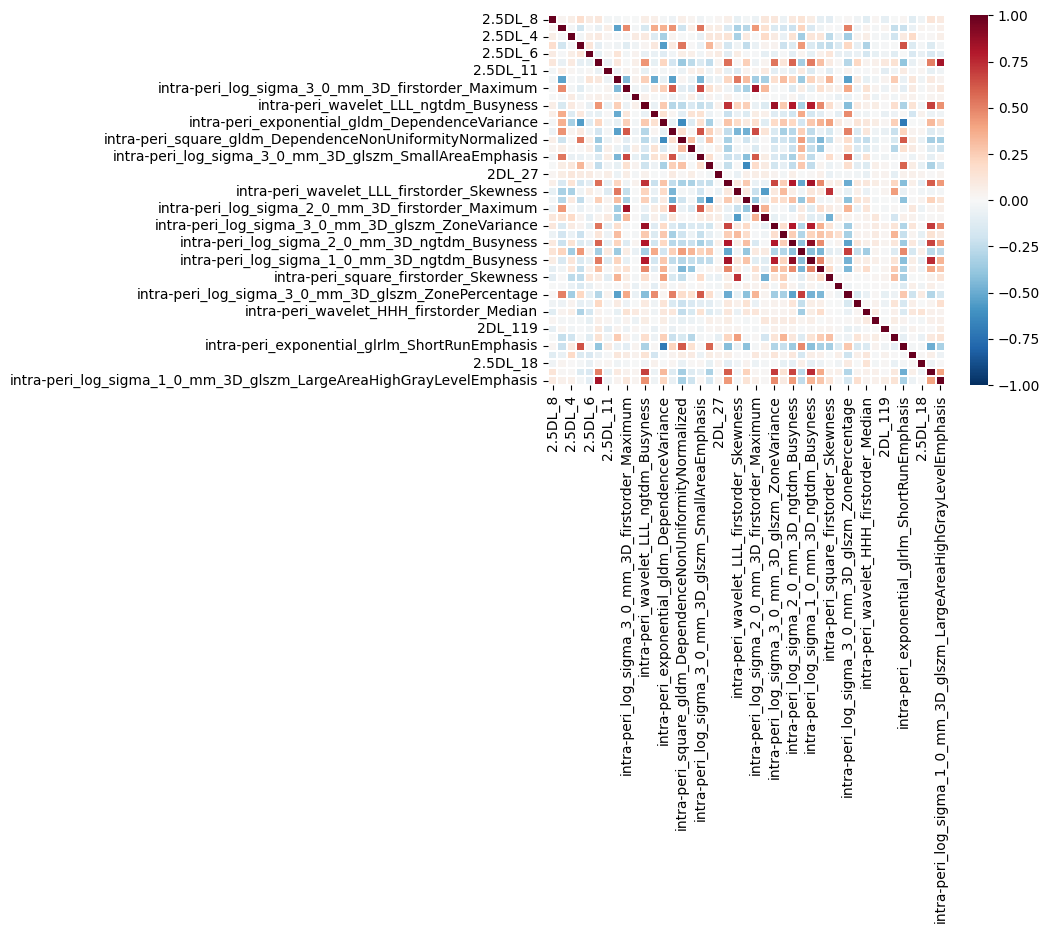

In [11]:
# 数字变量相关系数热图
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Train.loc[:, connames_train].corr(), vmin=-1, vmax=1, center=0, linecolor="white", linewidths=0.1, cmap="RdBu_r")
# plt.show()
plt.savefig("r_x_cor_heatmap.pdf", dpi=300)

# 拆分数据

In [12]:
from sksurv.datasets import get_x_y
# gbsgx, gbsgy = get_x_y(gbsg, attr_labels=["status", "rfstime"], pos_label=1)
# print(gbsgx)
# print(gbsgy)
# 训练集
Trainx, Trainy = get_x_y(Train, attr_labels=["event", "duration"], pos_label=1)
print(Trainx)
print(Trainy)
# 内部验证集
Internalx, Internaly = get_x_y(Internal, attr_labels=["event", "duration"], pos_label=1)
print(Internalx)
print(Internaly)

      2.5DL_8   2.5DL_3   2.5DL_4  \
0    0.081662 -0.654635 -0.396091   
1    0.942460 -1.061639  0.396285   
2   -0.255836  0.928865  0.974463   
3   -1.149721 -0.952892  0.852998   
4   -0.127231 -0.485288  1.083136   
..        ...       ...       ...   
376  1.686416 -0.815236  0.984612   
377  1.686492  0.298227 -0.453578   
378  0.673620 -1.403528 -0.713021   
379  0.852910 -0.895229  0.659353   
380 -0.751408 -0.633029  2.263725   

     intra-peri_exponential_gldm_DependenceNonUniformityNormalized   2.5DL_6  \
0                                            -0.273707              0.367815   
1                                             3.961650              0.133446   
2                                            -0.585785             -1.250419   
3                                            -0.497870              0.038468   
4                                            -0.288143              1.671187   
..                                                 ...                   ..

## KM估计

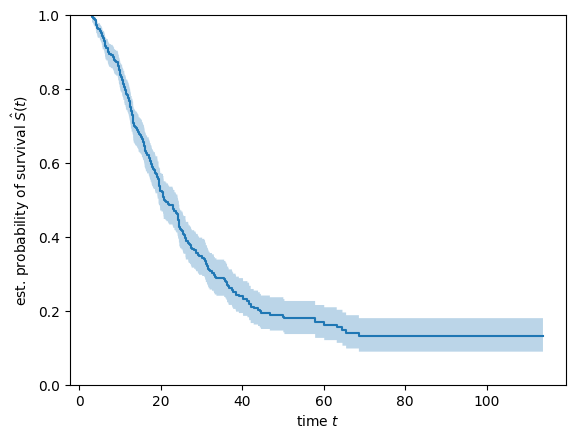

<Figure size 640x480 with 0 Axes>

In [13]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt

time, surv_prob, conf_int = kaplan_meier_estimator(Trainy["event"], Trainy["duration"], conf_type = "log-log")
plt.step(time, surv_prob, where="post")
plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.3, step="post")
plt.ylim(0,1)
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.show()
plt.savefig("r_km.pdf", dpi=300)

## 训练集和测试集

In [14]:
# from sklearn.model_selection import train_test_split
# trainx, testx, trainy, testy = train_test_split(gbsgx, gbsgy, test_size=0.2, stratify=gbsg["status"], random_state=42)
print(Trainx.shape)
print(Trainx.dtypes)
print(Internalx.shape)
print(Internalx.dtypes)
print(Trainy.shape)
print(Internaly.shape)

(381, 43)
2.5DL_8                                                                float64
2.5DL_3                                                                float64
2.5DL_4                                                                float64
intra-peri_exponential_gldm_DependenceNonUniformityNormalized          float64
2.5DL_6                                                                float64
intra-peri_log_sigma_1_0_mm_3D_glszm_ZoneVariance                      float64
2.5DL_11                                                               float64
intra-peri_wavelet_LLL_glcm_ClusterShade                               float64
intra-peri_log_sigma_3_0_mm_3D_firstorder_Maximum                      float64
2.5DL_219                                                              float64
intra-peri_wavelet_LLL_ngtdm_Busyness                                  float64
intra-peri_squareroot_glszm_LowGrayLevelZoneEmphasis                   float64
intra-peri_exponential_gldm_DependenceVari

In [15]:
import numpy as np
print("训练集事件时间范围", np.quantile(Trainy[Trainy["event"]]["duration"], [0, 1]))
print("测试集事件时间范围", np.quantile(Internaly[Internaly["event"]]["duration"], [0, 1]))

训练集事件时间范围 [ 3.2  68.63]
测试集事件时间范围 [ 3.37 77.6 ]


In [40]:
# import warnings
# warnings.filterwarnings("ignore")
# # 训练集测试集比较
# gbsg2 = gbsg.copy()
# gbsg2["dataset"] = "test"
# gbsg2["dataset"].iloc[trainx.index] = "train"
# table2 = TableOne(gbsg2, groupby="dataset", pval=True, htest_name=True)
# table2

In [ ]:
# gbsgx2, gbsgy2 = get_x_y(gbsg2, attr_labels=["status", "rfstime"], pos_label=1)

In [ ]:
# from sksurv.compare import compare_survival
# compare_survival(gbsgy2, gbsgx2["dataset"], return_stats=True)

(0.1613105083761521,
 0.687952818714026,
        counts  observed    expected  statistic
 group                                         
 test      138        60   57.273392   2.726608
 train     548       239  241.726608  -2.726608,
 array([[ 46.08744194, -46.08744194],
        [-46.08744194,  46.08744194]]))

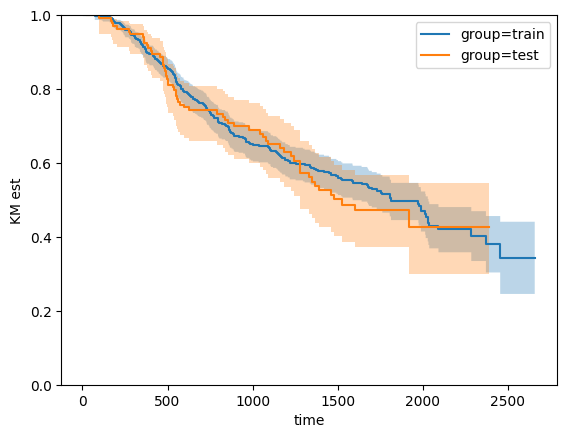

In [ ]:
# mxjqsakit.group_km(y=gbsgy2, event_status="status", event_time="rfstime", group=gbsgx2["dataset"])
# plt.savefig("r_km_group.pdf", dpi=300)

# rf

## 预处理设定

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
cattfppl = Pipeline(steps=[("impute", SimpleImputer(missing_values=pd.NA, strategy='most_frequent')), 
                           ("ohe", OneHotEncoder(sparse_output=False, drop="first"))])
contfppl = Pipeline(steps=[("impute", SimpleImputer(missing_values=pd.NA, strategy='median'))])
prep_rf = ColumnTransformer(
    [
        ("categorical", cattfppl, catnames_train),
        ("numerical", contfppl, connames_train)
    ],
    verbose_feature_names_out=False
).set_output(transform="pandas")
prep_rf

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(missing_values=<NA>,
                                                                strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 []),
                                ('numerical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(missing_values=<NA>,
                                                                strategy='median'))]),
                                 ['2.5DL_8', '2.5DL_3', '2.5DL_4',
                                  'intra-peri_exponential_gldm...
                                  'intra-peri_log_sigma_2_0_mm_3D_firstorder_Skewness',
                                  'intra-peri_log_sigma_3_0_mm_3D_glszm_ZoneVariance',
                                  'intra-peri_wavelet_LHL_firstorder_Median',
                                  'intra-peri_log_sigma_2_0_mm_3D_ngtdm_Busyness',
                                  'intra-peri_gradient_ngtdm_Contrast',
                                  'intra-peri_log_sigma_1_0_mm_3D_ngtdm_Busyness',
                                  'intra-peri_lbp_3D_k_glrlm_ShortRunHighGrayLevelEmphasis', ...])],
                  verbose_feature_names_out=False)

In [17]:
print(Trainx.shape)

(381, 43)


## 模型训练+超参数调优

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sksurv.ensemble import RandomSurvivalForest
import warnings
warnings.filterwarnings("ignore")

# 管道
rf_steps = [("prep", prep_rf), ("rf", RandomSurvivalForest(random_state=42))]

# 重抽样设定
rf_cv_hpo = KFold(n_splits = 5, shuffle = True, random_state=42)

# 超参数调优空间
rf_hpspace = dict(rf__max_depth = [1, 2, 3],
                  rf__max_features = [1, 2, 3])

### 网格搜索

In [19]:
rf = mxjqsakit.hpo(datax = Trainx, 
                    datay = Trainy, 
                    set_steps = rf_steps,
                    set_searchtype = "GridSearchCV", 
                    set_hpspace = rf_hpspace, 
                    set_cv = rf_cv_hpo)
rf

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(missing_values=<NA>,
                                                                                                        strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         []),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(miss...
                                                                          'intra-peri_wavelet_LHL_firstorder_Median',
                                                                          'intra-peri_log_sigma_2_0_mm_3D_ngtdm_Busyness',
                                                                          'intra-peri_gradient_ngtdm_Contrast',
                                                                          'intra-peri_log_sigma_1_0_mm_3D_ngtdm_Busyness',
                                                                          'intra-peri_lbp_3D_k_glrlm_ShortRunHighGrayLevelEmphasis', ...])],
                                                          verbose_feature_names_out=False)),
                                       ('rf',
                                        RandomSurvivalForest(random_state=42))]),
             param_grid={'rf__max_depth': [1, 2, 3],
                         'rf__max_features': [1, 2, 3]})

In [20]:
mxjqsakit.tuneplot(rf, scoreindim=True)

,rf__max_depth,rf__max_features,mean_cv_score,std_cv_score,rank_cv_score
0,1,1,0.604887,0.050817,7
1,1,2,0.602093,0.049587,8
2,1,3,0.595085,0.048072,9
3,2,1,0.613303,0.046308,3
4,2,2,0.614783,0.054567,1
5,2,3,0.608613,0.027439,5
6,3,1,0.614594,0.035791,2
7,3,2,0.610527,0.044379,4
8,3,3,0.606013,0.032238,6


### 随机搜索

In [46]:
rf = mxjqsakit.hpo(datax = Trainx, 
                    datay = Trainy, 
                    set_steps = rf_steps,
                    set_searchtype = "RandomizedSearchCV", 
                    set_hpspace = rf_hpspace, 
                    set_cv = rf_cv_hpo,
                    set_randomiters = 42)
rf

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(missing_values=<NA>,
                                                                                                              strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               []),
                                                                              ('numerical',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImpute...
                                                                                'intra-peri_log_sigma_2_0_mm_3D_ngtdm_Busyness',
                                                                                'intra-peri_gradient_ngtdm_Contrast',
                                                                                'intra-peri_log_sigma_1_0_mm_3D_ngtdm_Busyness',
                                                                                'intra-peri_lbp_3D_k_glrlm_ShortRunHighGrayLevelEmphasis', ...])],
                                                                verbose_feature_names_out=False)),
                                             ('rf',
                                              RandomSurvivalForest(random_state=42))]),
                   n_iter=42,
                   param_distributions={'rf__max_depth': [1, 2, 3],
                                        'rf__max_features': [1, 2, 3]},
                   random_state=42)

In [38]:
mxjqsakit.tuneplot(rf, scoreindim=True)

,rf__max_features,rf__max_depth,mean_cv_score,std_cv_score,rank_cv_score
0,2,3,0.746843,0.024444,8
1,3,3,0.747098,0.023183,7
2,4,3,NaN,NaN,9
3,2,4,0.748867,0.026419,6
4,3,4,0.750331,0.025143,5
5,4,4,NaN,NaN,9
6,2,5,0.756481,0.021439,2
7,3,5,0.753238,0.023701,4
8,4,5,NaN,NaN,9
9,2,6,0.756542,0.023294,1


## 预测评估

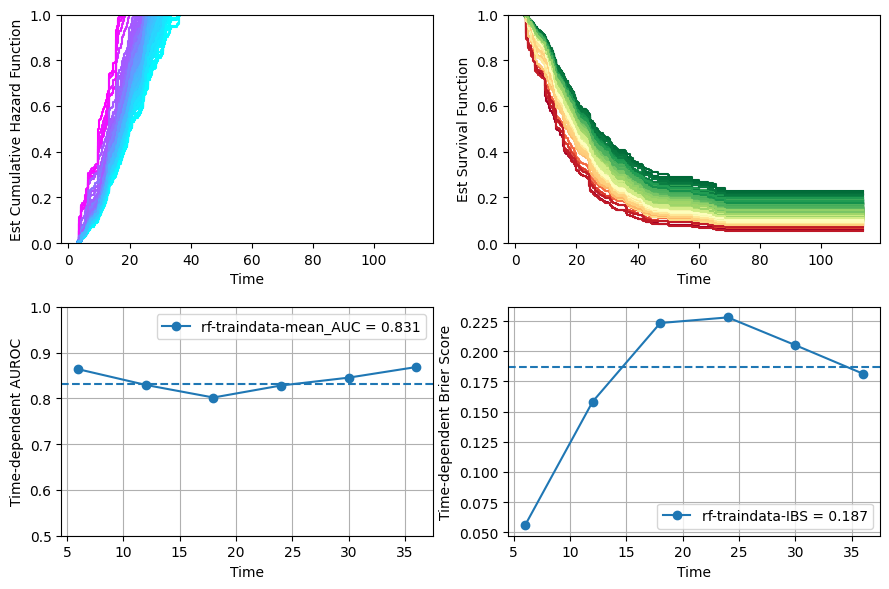

In [21]:
import numpy as np
# interest_times = np.arange(6, 12, 24)
interest_times = np.array([6, 12, 18, 24, 30, 36])
predresult_train_rf = mxjqsakit.evalfunc(
    model=rf.best_estimator_, 
    actualx=Trainx, 
    actualy=Trainy, 
    backy=Trainy, 
    timepoints=interest_times, 
    modelname="rf", 
    datasetname="traindata"
)
plt.savefig("r_eval_train_rf.pdf", dpi=300)

In [22]:
predresult_train_rf["metrics"]

,model,dataset,Cindex,Cindex_ipcw,meanAUC,IBS
0,rf,traindata,0.735,0.734,0.831,0.187


In [22]:
predresult_train_rf["riskscore"]
# 转换为 DataFrame（指定列名，方便后续识别）
riskscore_df = pd.DataFrame(
    predresult_train_rf["riskscore"],  # 原始数据
    columns=["riskscore"]  # 列名，可自定义
)

# 保存为 CSV（index=False 表示不保存索引）
riskscore_df.to_csv("三个模型前融合-train_riskscore_results.csv", index=False)

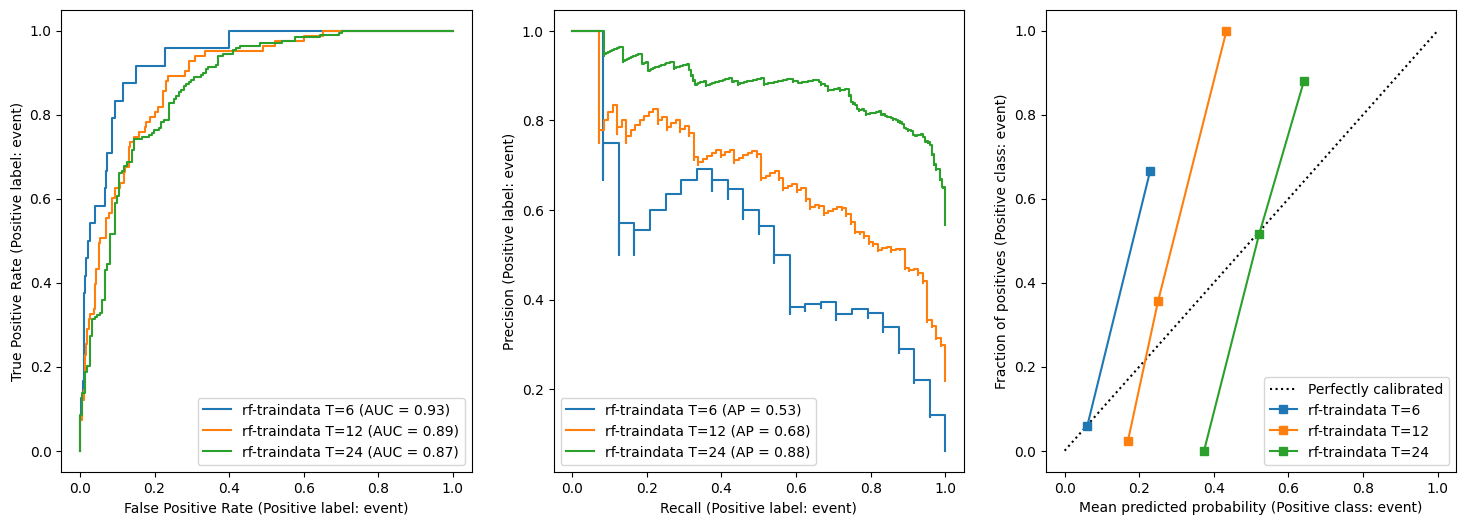

In [23]:
plots_train_rf = mxjqsakit.saplot(actualy = Trainy, 
                                     predsp = predresult_train_rf["sf"], 
                                     timepoint = [6, 12, 24], 
                                     timepoints = interest_times, 
                                     modelname = "rf", 
                                     datasetname="traindata")
plt.savefig("r_eval_train_rf_2.pdf", dpi=300)

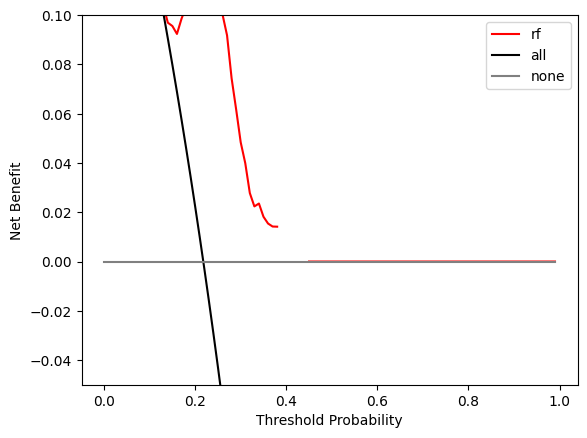

In [24]:
from dcurves import plot_graphs
plot_graphs(
    plot_df=mxjqsakit.dcadata(actualy = Trainy, predsp = predresult_train_rf["sf"], timepoint = 12, timepoints = interest_times, modelname = "rf"),
    graph_type='net_benefit',
    show_grid=False,
    color_names=["red", "black", "grey"],
    y_limits=[-0.05, 0.1],
    file_name="r_dca_train_rf.pdf",
    dpi=300
  )

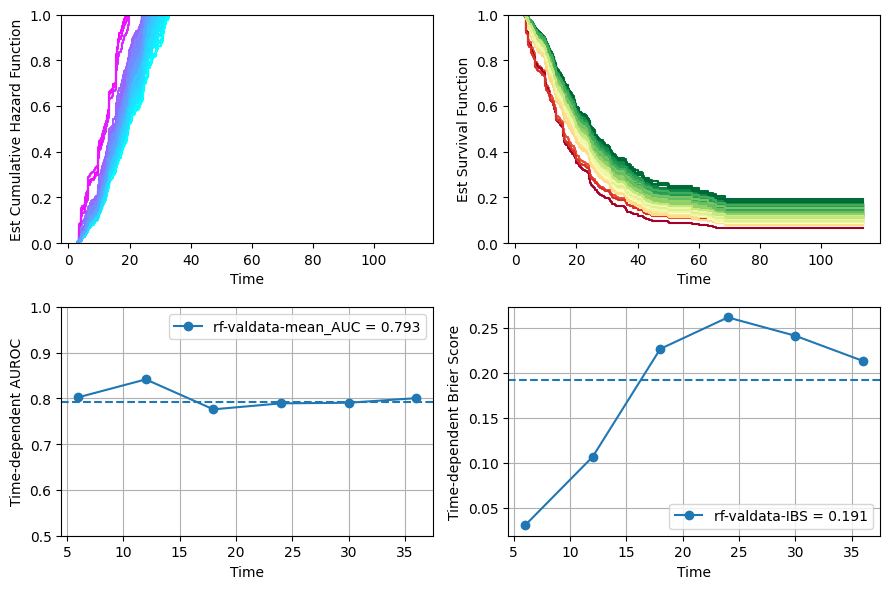

In [23]:
predresult_test_rf = mxjqsakit.evalfunc(
    model=rf.best_estimator_, 
    actualx=Internalx, 
    actualy=Internaly, 
    backy=Trainy, 
    timepoints=interest_times, 
    modelname="rf", 
    datasetname="valdata"
)
plt.savefig("r_eval_test_rf.pdf", dpi=300)

In [24]:
predresult_test_rf["metrics"]

,model,dataset,Cindex,Cindex_ipcw,meanAUC,IBS
0,rf,valdata,0.722,0.709,0.793,0.191


In [182]:
predresult_test_rf["riskscore"]
# 转换为 DataFrame（指定列名，方便后续识别）
riskscore_df_test = pd.DataFrame(
    predresult_test_rf["riskscore"],  # 原始数据
    columns=["riskscore"]  # 列名，可自定义
)

# 保存为 CSV（index=False 表示不保存索引）
riskscore_df_test.to_csv("三个模型前融合-val_riskscore_results.csv", index=False)

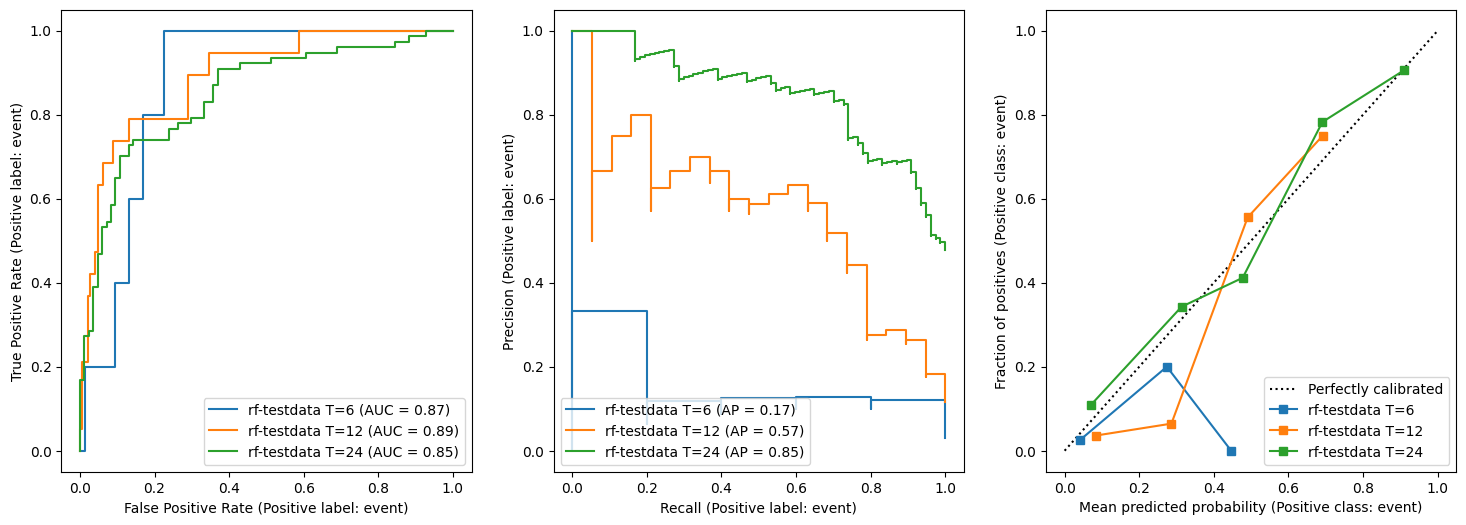

In [32]:
plots_test_rf = mxjqsakit.saplot(actualy = Internaly, 
                                     predsp = predresult_test_rf["sf"], 
                                     timepoint = [6, 12, 24], 
                                     timepoints = interest_times, 
                                     modelname = "rf", 
                                     datasetname="testdata")
plt.savefig("r_eval_test_rf_2.pdf", dpi=300)

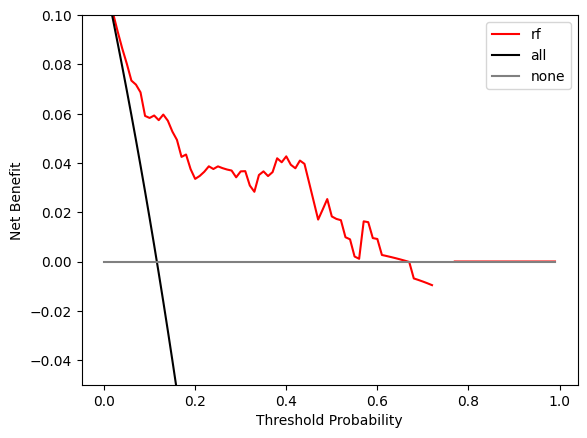

In [33]:
from dcurves import plot_graphs
plot_graphs(
    plot_df=mxjqsakit.dcadata(actualy = Internaly, predsp = predresult_test_rf["sf"], timepoint = 12, timepoints = interest_times, modelname = "rf"),
    graph_type='net_benefit',
    show_grid=False,
    color_names=["red", "black", "grey"],
    y_limits=[-0.05, 0.1],
    file_name="r_dca_test_rf.pdf",
    dpi=300
  )

(58, 43)
2.5DL_8                                                                float64
2.5DL_3                                                                float64
2.5DL_4                                                                float64
intra-peri_exponential_gldm_DependenceNonUniformityNormalized          float64
2.5DL_6                                                                float64
intra-peri_log_sigma_1_0_mm_3D_glszm_ZoneVariance                      float64
2.5DL_11                                                               float64
intra-peri_wavelet_LLL_glcm_ClusterShade                               float64
intra-peri_log_sigma_3_0_mm_3D_firstorder_Maximum                      float64
2.5DL_219                                                              float64
intra-peri_wavelet_LLL_ngtdm_Busyness                                  float64
intra-peri_squareroot_glszm_LowGrayLevelZoneEmphasis                   float64
intra-peri_exponential_gldm_DependenceVaria

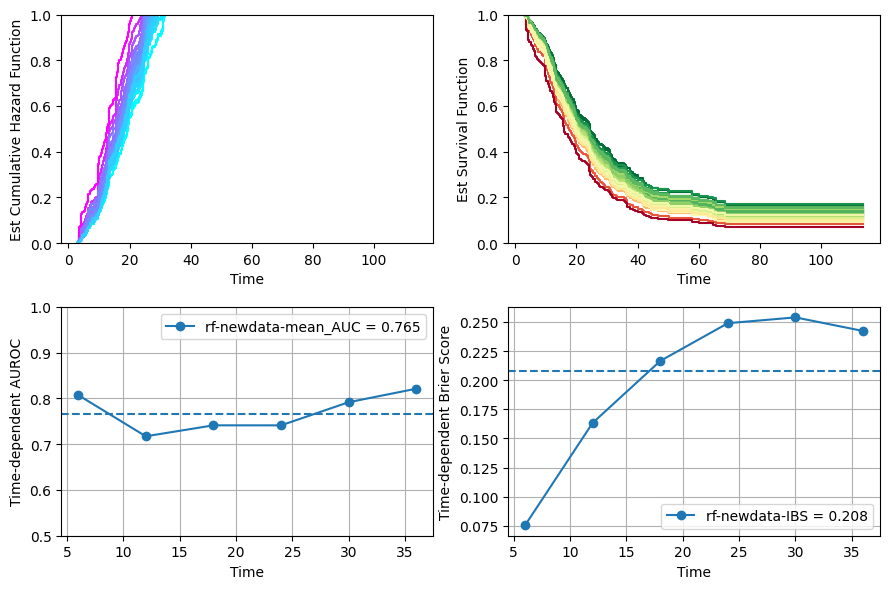

In [205]:
import pandas as pd
new = pd.read_csv("Pre_combined_test2_cox.csv")
# 剔除无关变量
new.drop("ID", axis=1, inplace=True)
# 分类变量转换为category
for i in catnames_train:
    new[i] = new[i].astype("category")
newx, newy = get_x_y(new, attr_labels=["event", "duration"], pos_label=1)
print(newx.shape)
print(newx.dtypes)
# print(Trainx.shape)
# print(Trainx.dtypes)
predresult_new_rf = mxjqsakit.evalfunc(
    model=rf.best_estimator_, 
    actualx=newx, 
    actualy=newy, 
    backy=Trainy, 
    timepoints=interest_times, 
    modelname="rf", 
    datasetname="newdata"
)
plt.savefig("r_eval_new_rf.pdf", dpi=300)

In [206]:
predresult_new_rf["metrics"]

,model,dataset,Cindex,Cindex_ipcw,meanAUC,IBS
0,rf,newdata,0.688,0.66,0.765,0.208


In [207]:
predresult_new_rf["riskscore"]
# 转换为 DataFrame（指定列名，方便后续识别）
riskscore_df_new = pd.DataFrame(
    predresult_new_rf["riskscore"],  # 原始数据
    columns=["riskscore"]  # 列名，可自定义
)

# 保存为 CSV（index=False 表示不保存索引）
riskscore_df_new.to_csv("三个模型前融合-test2_riskscore_results.csv", index=False)

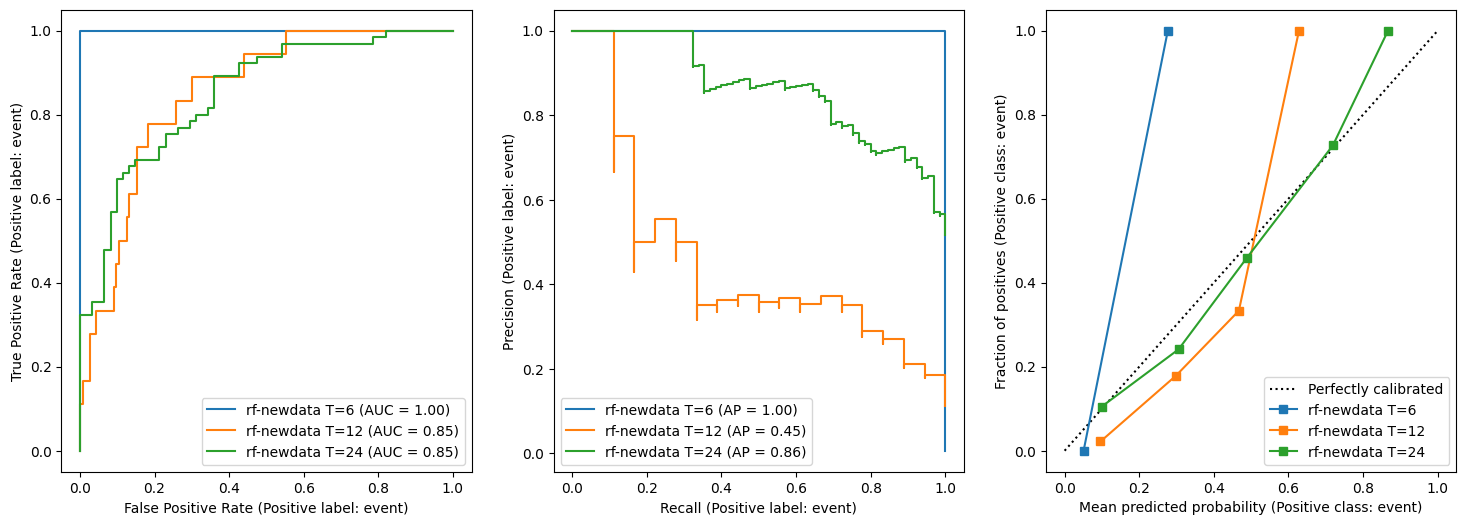

In [79]:
plots_new_rf = mxjqsakit.saplot(actualy = newy, 
                                     predsp = predresult_new_rf["sf"], 
                                     timepoint = [6, 12, 24], 
                                     timepoints = interest_times, 
                                     modelname = "rf", 
                                     datasetname="newdata")
plt.savefig("r_eval_new_rf_2.pdf", dpi=300)

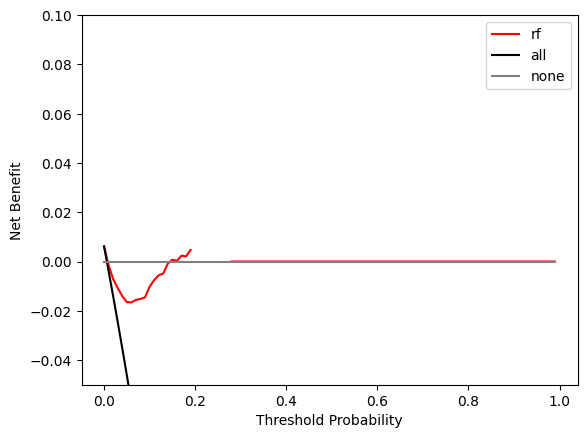

In [81]:
from dcurves import plot_graphs
plot_graphs(
    plot_df=mxjqsakit.dcadata(actualy = newy, predsp = predresult_new_rf["sf"], timepoint = 6, timepoints = interest_times, modelname = "rf"),
    graph_type='net_benefit',
    show_grid=False,
    color_names=["red", "black", "grey"],
    y_limits=[-0.05, 0.1],
    file_name="r_dca_new_rf.pdf",
    dpi=300
  )

## 模型解释

### 变量重要性

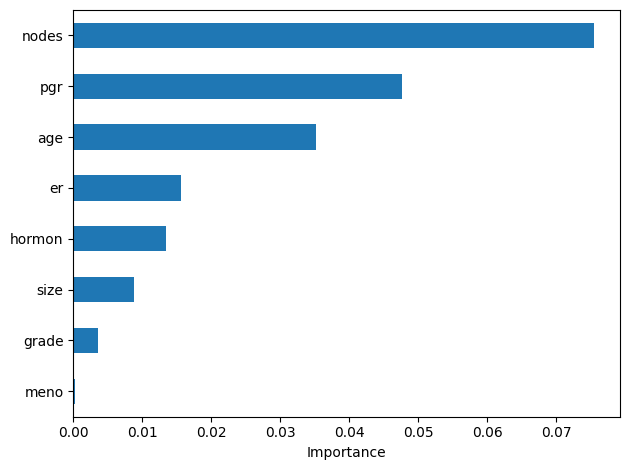

In [34]:
import warnings
warnings.filterwarnings("ignore")
mxjqsakit.vipplot(rf, trainx, trainy, type="bar")
plt.savefig("r_vipbar_rf.pdf", dpi=300)

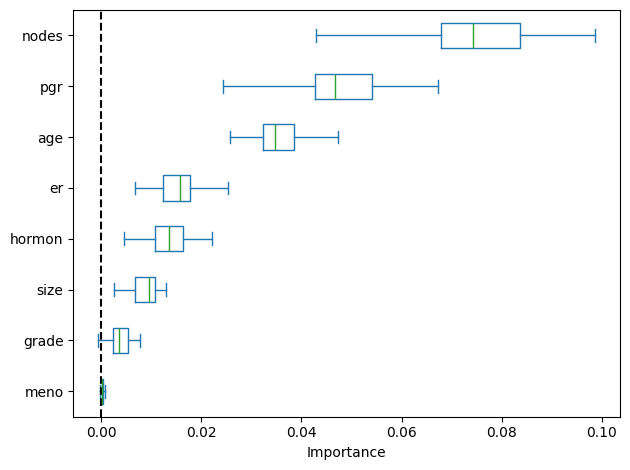

In [35]:
mxjqsakit.vipplot(rf, trainx, trainy, type="box")
plt.savefig("r_vipbox_rf.pdf", dpi=300)

### shap

In [ ]:
import shap
shap.initjs()

def shapmodel_rf(x):
    return rf.best_estimator_["rf"].predict(x)

trainx = shap.sample(trainx, random_state=42)
final_trainx = rf.best_estimator_["prep"].transform(trainx)
final_trainx

explainer_rf = shap.Explainer(shapmodel_rf, final_trainx)
shapvalues_rf = explainer_rf(final_trainx)
# shapvalues_rf
explanation_rf = mxjqsakit.shapagg(shapvalues_rf, trainx, final_trainx)
# explanation_rf

ExactExplainer explainer:  12%|█▏        | 12/100 [05:07<38:29, 26.25s/it]

In [ ]:
mxjqsakit.shap2plot(explanation_rf, trainx)
plt.savefig("r_shap_barbeeswarm_rf.pdf", dpi=300, bbox_inches="tight")   

In [ ]:
shap.plots.beeswarm(explanation_rf, max_display = 20, show = False)
plt.savefig("r_shap_beeswarm_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.violin(explanation_rf, plot_type="layered_violin", max_display = 20, show = False)
plt.savefig("r_shap_violin_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.bar(explanation_rf, max_display = 20, show = False)
plt.savefig("r_shap_vipbar_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.scatter(explanation_rf[:, "pgr"], show = False)
plt.savefig("r_shap_pdp_rf_pgr.pdf", dpi=300, bbox_inches="tight")

shap.plots.scatter(explanation_rf[:, "pgr"], color=explanation_rf, show = False)
plt.savefig("r_shap_pdp_rf_color_pgr.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.scatter(explanation_rf[:, "grade"], show = False)
plt.savefig("r_shap_pdp_rf_grade.pdf", dpi=300, bbox_inches="tight")

shap.plots.scatter(explanation_rf[:, "grade"], color=explanation_rf, show = False)
plt.savefig("r_shap_pdp_rf_color_grade.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.bar(explanation_rf[0], max_display = 20, show = False)
plt.savefig("r_shap_41bar_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.waterfall(explanation_rf[0], max_display = 20)
# shap.plots.waterfall(explanation_rf[0], max_display = 20, show=False)
# plt.savefig("r_shap_41warterfall_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.force(explanation_rf[0], matplotlib = True, show=False)
# plt.savefig("r_shap_41force_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.plots.force(explanation_rf)

In [ ]:
plt.close()
shap.plots.heatmap(explanation_rf)
# shap.plots.heatmap(explanation_rf, show=False)
# plt.savefig("r_shap_heatmap_rf.pdf", dpi=300, bbox_inches="tight")

In [ ]:
shap.decision_plot(explanation_rf.base_values[1],
                   explanation_rf.values, 
                   explanation_rf.data,
                   feature_names=list(trainx.columns.sort_values()))
# shap.decision_plot(explanation_rf.base_values[1],
#                    explanation_rf.values, 
#                    explanation_rf.data,
#                    feature_names=list(trainx.columns.sort_values()),
#                    show=False)
# plt.savefig("r_shap_decision_rf.pdf", dpi=300, bbox_inches="tight")

# 保存结果

In [ ]:
rf_result = dict(model = rf, 
                    predeval_train = predresult_train_rf,
                    predeval_test = predresult_test_rf,
                    plots_train = plots_train_rf,
                    plots_test = plots_test_rf)
from joblib import dump
dump(rf_result, ".\\result\\rf_result.joblib")

In [ ]:
shiny4rf = dict(model = rf, 
                    train_x = trainx, 
                    train_y = trainy,
                    explainer_lr = explainer_rf)
from joblib import dump
dump(shiny4rf, ".\\result4shiny\\shiny4rf.joblib")